In [177]:
# Loading in necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
# Reading in the csv file as a dataframe, making a copy, and previewing the first 5 rows
df = pd.read_csv('movies.csv')
pd.set_option('display.max_columns', None)
original = df.copy()

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [179]:
# Checking for potential duplicate rows and showing the dataset information
print(f'There are {df.duplicated().sum()} duplicated rows.\n')

print(f'Dataset Information:\n')
df.info()

# Shape of (7668 X 15)
# The 'budget' column has around 2000 missing values

There are 0 duplicated rows.

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [180]:
# Dropping rows with missing values and presenting the information with the remaining rows
df = df.dropna()

df.info()

# Dataset now has a shape of (5421 x 15)

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [181]:
# Displaying summary statistics for the numerical columns
df.describe().round(1)

,year,score,votes,budget,gross,runtime
count,5421.0,5421.0,5421.0,5421.0,5.421000e+03,5421.0
mean,2001.7,6.4,115066.1,36009170.5,1.032297e+08,108.2
std,10.5,1.0,184407.3,41573374.0,1.873027e+08,18.1
min,1980.0,1.9,195.0,6000.0,3.090000e+02,63.0
25%,1993.0,5.8,19000.0,10000000.0,1.073640e+07,95.0
50%,2002.0,6.5,52000.0,21800000.0,3.686941e+07,105.0
75%,2011.0,7.1,129000.0,45000000.0,1.124625e+08,118.0
max,2020.0,9.3,2400000.0,356000000.0,2.847246e+09,271.0


In [182]:
# Changing unnecessary floats to integers
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [183]:
# Utilizing regex to create a new column, 'year_released', that contains the correct release year
df['year_released'] = df['released'].str.extract(r'(\d{4})')

# Dropping the incorrect original 'year' column
df = df.drop(columns = 'year')

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [184]:
# Displaying max rows and sorting the dataframe by highest gross
df = df.sort_values(by = ['gross'], ascending = False, inplace = False)

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [185]:
# Grouping by 'genre' and presenting the average score for that genre
df.groupby('genre')['score'].mean().sort_values(ascending = False).round(1).reset_index()

,genre,score
0,Biography,7.1
1,Drama,6.7
2,Animation,6.7
3,Crime,6.7
4,Family,6.7
5,Mystery,6.7
6,Romance,6.6
7,Sci-Fi,6.4
8,Adventure,6.3
9,Action,6.2


In [186]:
# Grouping by 'rating' and getting the average score for that rating
df.groupby('rating')['score'].mean().sort_values(ascending = False).round(1).reset_index()

,rating,score
0,X,7.3
1,Not Rated,6.9
2,TV-MA,6.8
3,Unrated,6.8
4,NC-17,6.7
5,G,6.6
6,R,6.5
7,PG-13,6.3
8,PG,6.2
9,Approved,3.4


In [187]:
# Grouping by 'star' and getting the count of movies that they have appeared in along with their average score for those movies
grouped_star_scores = df.groupby('star').agg(star_count = ('score', 'count'), 
                      average_score = ('score', 'mean')).sort_values(by = 'average_score', ascending = False).round(1).reset_index()

# Filtering the new dataframe to only contain stars that have appeared in at least 10 movies and printing the result  
top_star_scores = grouped_star_scores[grouped_stars['star_count'] >= 10].head()
top_star_scores

,star,star_count,average_score
157,Leonardo DiCaprio,20,7.5
169,Kevin Spacey,10,7.5
174,Christian Bale,20,7.4
231,Daniel Radcliffe,10,7.3
306,Russell Crowe,14,7.2


In [188]:
# Creating a new dataframe that contains only the numeric columns 
df_numeric = df.select_dtypes(include = [np.number])

# Generating a correlation matrix of the variables 
corr = df_numeric.corr().round(2)

corr

,score,votes,budget,gross,runtime
score,1.00,0.47,0.07,0.22,0.41
votes,0.47,1.00,0.44,0.61,0.35
budget,0.07,0.44,1.00,0.74,0.32
gross,0.22,0.61,0.74,1.00,0.28
runtime,0.41,0.35,0.32,0.28,1.00


In [189]:
# Constructing another dataframe that contains the columns that will be used for the final correlation analysis
main_cols = df[['rating', 'genre', 'score', 'votes', 'budget', 'gross', 'runtime']]

# Forming new dummy variables from the categorical variables 'rating' and 'genre'
main_cols_num = pd.get_dummies(main_cols, columns = ['rating', 'genre']).astype(int)

main_cols_num.head()

,score,votes,budget,gross,runtime,rating_Approved,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-MA,rating_Unrated,rating_X,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_Western
5445,7,1100000,237000000,2847246203,162,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7445,8,903000,356000000,2797501328,181,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3045,7,1100000,200000000,2201647264,194,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6663,7,876000,245000000,2069521700,138,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7244,8,897000,321000000,2048359754,149,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [190]:
# Creating a new correlation matrix using the dataframe that contains the dummy variables
corr_full = main_cols_num.corr().round(2)

corr_full

,score,votes,budget,gross,runtime,rating_Approved,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-MA,rating_Unrated,rating_X,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_Western
score,1.00,0.46,0.07,0.21,0.39,-0.04,0.02,0.02,0.05,-0.08,-0.07,0.11,0.01,0.02,0.01,-0.08,-0.03,0.07,0.17,-0.13,0.08,0.14,0.00,-0.03,-0.12,0.02,0.01,0.00,-0.02,-0.01
votes,0.46,1.00,0.44,0.61,0.35,-0.01,0.01,-0.01,-0.04,-0.07,0.10,-0.04,-0.01,-0.01,-0.00,0.16,0.01,0.04,0.00,-0.14,-0.00,-0.02,0.01,-0.03,-0.04,0.05,-0.01,-0.00,-0.02,-0.01
budget,0.07,0.44,1.00,0.74,0.32,-0.01,0.06,-0.03,-0.06,0.09,0.25,-0.29,-0.00,-0.04,-0.01,0.32,0.06,0.23,-0.06,-0.20,-0.09,-0.13,0.01,-0.04,-0.12,-0.01,-0.01,-0.01,-0.02,-0.01
gross,0.21,0.61,0.74,1.00,0.28,-0.00,0.07,-0.02,-0.04,0.08,0.19,-0.24,0.03,-0.03,-0.01,0.21,0.04,0.22,-0.06,-0.15,-0.08,-0.10,0.06,-0.03,-0.05,0.00,-0.01,-0.01,-0.01,-0.01
runtime,0.39,0.35,0.32,0.28,1.00,0.01,-0.15,-0.01,0.04,-0.12,0.08,0.05,0.02,-0.03,0.00,0.10,0.01,-0.21,0.19,-0.21,0.07,0.17,0.00,-0.04,-0.14,0.03,0.00,-0.01,-0.02,-0.01
rating_Approved,-0.04,-0.01,-0.01,-0.00,0.01,1.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.01,0.05,-0.00,-0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
rating_G,0.02,0.01,0.06,0.07,-0.15,-0.00,1.00,-0.01,-0.01,-0.06,-0.10,-0.14,-0.00,-0.01,-0.00,-0.09,0.03,0.45,-0.03,-0.06,-0.04,-0.05,0.04,-0.01,-0.03,-0.01,-0.00,-0.00,-0.01,-0.00
rating_NC-17,0.02,-0.01,-0.03,-0.02,-0.01,-0.00,-0.01,1.00,-0.00,-0.02,-0.03,-0.05,-0.00,-0.00,-0.00,-0.03,-0.01,-0.01,-0.01,-0.01,0.03,0.04,-0.00,-0.00,0.01,-0.00,-0.00,-0.00,-0.00,-0.00
rating_Not Rated,0.05,-0.04,-0.06,-0.04,0.04,-0.00,-0.01,-0.00,1.00,-0.04,-0.06,-0.09,-0.00,-0.01,-0.00,-0.03,-0.02,-0.01,-0.00,-0.03,0.01,0.07,-0.00,0.04,0.02,-0.01,-0.00,-0.00,-0.00,-0.00
rating_PG,-0.08,-0.07,0.09,0.08,-0.12,-0.01,-0.06,-0.02,-0.04,1.00,-0.31,-0.43,-0.01,-0.03,-0.01,-0.10,0.23,0.29,-0.01,0.03,-0.12,-0.09,0.04,-0.02,-0.09,-0.03,0.04,-0.00,-0.00,0.02


In [191]:
# Pairing and sorting the values for increased readability
corr_pairs = corr_full.unstack().round(2).sort_values(
             ascending = False).reset_index().rename(columns = {'level_0': 'Variable_1', 'level_1': 'Variable_2', 0: 'Correlation'})

corr_pairs.head()

,Variable_1,Variable_2,Correlation
0,gross,gross,1.0
1,genre_Sci-Fi,genre_Sci-Fi,1.0
2,budget,budget,1.0
3,rating_NC-17,rating_NC-17,1.0
4,genre_Horror,genre_Horror,1.0


In [192]:
# Filtering the values to only contain pairs with a correlation coefficient of higher than .5 and less than 1.0
high_corr = corr_pairs[(corr_pairs['Correlation'] > .5) & (corr_pairs['Correlation'] < 1)].sort_values(by = 'Correlation',
            ascending = False).rename(columns = {'level_0': 'Variable_1', 'level_1': 'Variable_2', 0: 'Correlation'})

high_corr

# Budget and votes have the highest positive correlation with gross earnings

,Variable_1,Variable_2,Correlation
30,gross,budget,0.74
31,budget,gross,0.74
32,votes,gross,0.61
33,gross,votes,0.61


<Figure size 1200x600 with 0 Axes>

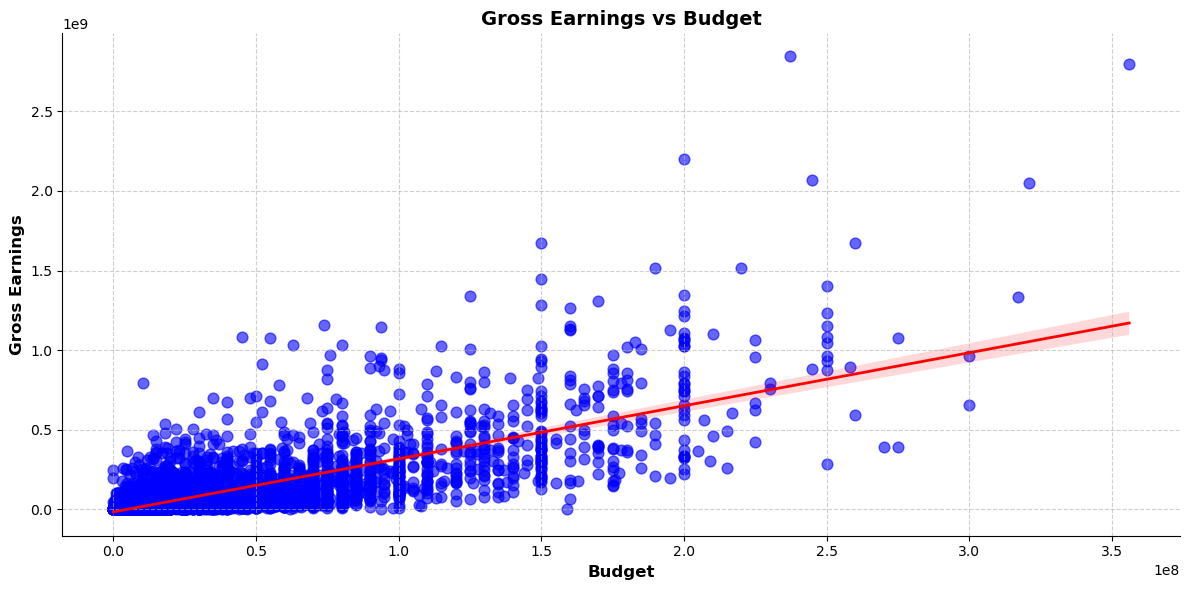

In [193]:
# Scatter plot with a fitted regression line to visualize the relationship between budget and gross earnings
plt.figure(figsize = (12, 6))

sns.lmplot(x = 'budget', y = 'gross', data = df, line_kws = {'color': 'red', 'linewidth': 2}, scatter_kws = {'s': 60, 'color': 'blue', 'alpha': 0.6}, height = 6, aspect = 2)
plt.title('Gross Earnings vs Budget', fontsize = 14, weight = 'bold')
plt.xlabel('Budget', fontsize = 12, weight = 'bold')
plt.ylabel('Gross Earnings', fontsize = 12, weight = 'bold')
plt.grid(linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

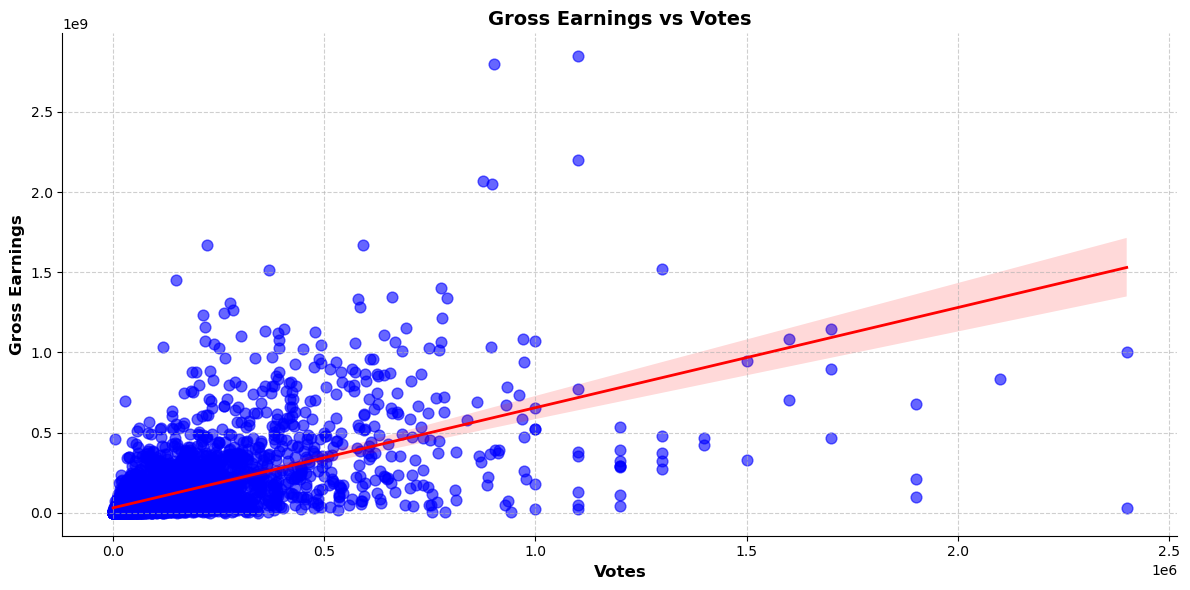

In [194]:
# Scatter plot with a fitted regression line to visualize the relationship between votes and gross earnings
plt.figure(figsize = (12, 6))

sns.lmplot(x = 'votes', y = 'gross', data = df, line_kws = {'color': 'red', 'linewidth': 2}, scatter_kws = {'s': 60, 'color': 'blue', 'alpha': 0.6}, height = 6, aspect = 2)
plt.title('Gross Earnings vs Votes', fontsize = 14, weight = 'bold')
plt.xlabel('Votes', fontsize = 12, weight = 'bold')
plt.ylabel('Gross Earnings', fontsize = 12, weight = 'bold')
plt.grid(linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()